Initial State: (0, {'prob': 1})
Action Space: Discrete(4)
Observation Space: Discrete(16)
Actions: 0=Left, 1=Down, 2=Right, 3=Up
Step 0: State=(0, {'prob': 1}), Action=3, Reward=0, Next State=0, Terminated=False
Step 1: State=0, Action=1, Reward=0, Next State=4, Terminated=False
Step 2: State=4, Action=3, Reward=0, Next State=0, Terminated=False
Step 3: State=0, Action=2, Reward=0, Next State=1, Terminated=False
Step 4: State=1, Action=1, Reward=0, Next State=5, Terminated=True
Episode 1 ended with total reward: 0

Step 0: State=(0, {'prob': 1}), Action=2, Reward=0, Next State=1, Terminated=False
Step 1: State=1, Action=1, Reward=0, Next State=5, Terminated=True
Episode 2 ended with total reward: 0

Step 0: State=(0, {'prob': 1}), Action=3, Reward=0, Next State=0, Terminated=False
Step 1: State=0, Action=3, Reward=0, Next State=0, Terminated=False
Step 2: State=0, Action=1, Reward=0, Next State=4, Terminated=False
Step 3: State=4, Action=3, Reward=0, Next State=0, Terminated=False
Step

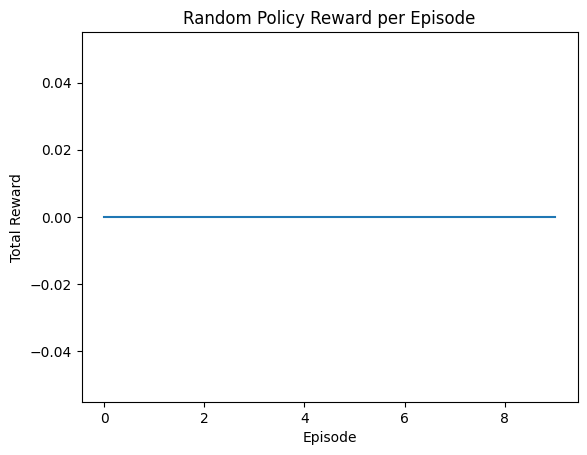

Step 0: State=0, Action=1, Reward=0, Next State=4, Terminated=False
Step 1: State=4, Action=1, Reward=0, Next State=8, Terminated=False
Step 2: State=8, Action=2, Reward=0, Next State=9, Terminated=False
Step 3: State=9, Action=2, Reward=0, Next State=10, Terminated=False
Step 4: State=10, Action=1, Reward=0, Next State=14, Terminated=False
Step 5: State=14, Action=2, Reward=1, Next State=15, Terminated=True
Episode 1 ended with total reward: 1, done=True

Step 0: State=0, Action=1, Reward=0, Next State=4, Terminated=False
Step 1: State=4, Action=1, Reward=0, Next State=8, Terminated=False
Step 2: State=8, Action=2, Reward=0, Next State=9, Terminated=False
Step 3: State=9, Action=2, Reward=0, Next State=10, Terminated=False
Step 4: State=10, Action=1, Reward=0, Next State=14, Terminated=False
Step 5: State=14, Action=2, Reward=1, Next State=15, Terminated=True
Episode 2 ended with total reward: 1, done=True

Step 0: State=0, Action=1, Reward=0, Next State=4, Terminated=False
Step 1: St

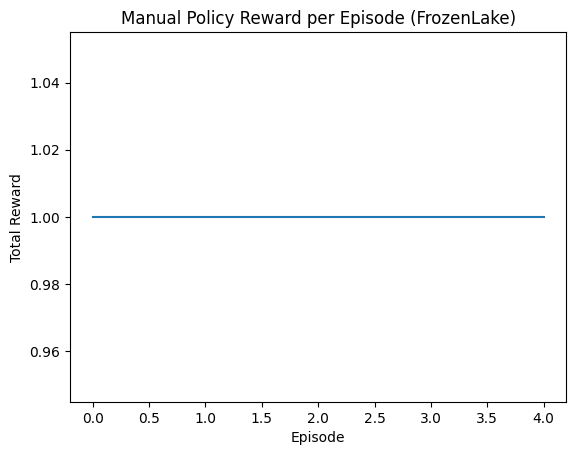

[1, 1, 1, 1, 1]


In [35]:
import matplotlib.pyplot as plt
def EnvironmentSetup():
    import gymnasium as gym
    import numpy as np
    if not hasattr(np,"bool8"):np.bool8=np.bool_
    import matplotlib.pyplot as plt

    env=gym.make('FrozenLake-v1',is_slippery=False)  # deterministic environment
    state=env.reset()

    print("Initial State:",state)
    print("Action Space:",env.action_space)
    print("Observation Space:",env.observation_space)
    print("Actions: 0=Left, 1=Down, 2=Right, 3=Up")

    return env,state
env,state=EnvironmentSetup()

def InteractionLoop(env,num_episodes=5):
    for episode in range(num_episodes):
        state=env.reset()
        terminated=False
        total_reward=0
        step_count=0
        while not terminated:
            action=env.action_space.sample()
            next_state, reward, terminated, truncated, info = env.step(action)
            terminated = terminated or truncated   # merge flags
            total_reward+=reward
            print(f"Step {step_count}: State={state}, Action={action}, Reward={reward}, Next State={next_state}, Terminated={terminated}")
            state=next_state
            step_count+=1
        print(f"Episode {episode+1} ended with total reward: {total_reward}\n")
InteractionLoop(env,5)


def TrackCumulativeRewards(env,n_episodes=10,plot=True):
    import matplotlib.pyplot as plt
    rewards=[]
    for episode in range(n_episodes):
        state=env.reset()
        if isinstance(state,tuple):state=state[0]
        terminated=False
        total_reward=0
        while not terminated:
            action=env.action_space.sample()
            next_state, reward, terminated, truncated, info = env.step(action)
            terminated = terminated or truncated   # merge flags
            total_reward+=reward
        rewards.append(total_reward)
    if plot:
        plt.figure()
        plt.plot(rewards)
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("Random Policy Reward per Episode")
        plt.show()
    return rewards
rewards=TrackCumulativeRewards(env,n_episodes=10,plot=True)


def RunManualPolicy(env,actions,n_episodes=5,print_steps=True):
    rewards=[]
    for episode in range(n_episodes):
        state,info=env.reset()
        terminated=False
        total_reward=0
        step_count=0
        for a in actions:
            if terminated:break
            next_state,reward,terminated,truncated,info=env.step(int(a))
            terminated=terminated or truncated
            total_reward+=reward
            if print_steps:
                print(f"Step {step_count}: State={state}, Action={a}, Reward={reward}, Next State={next_state}, Terminated={terminated}")
            state=next_state
            step_count+=1
        print(f"Episode {episode+1} ended with total reward: {total_reward}, done={terminated}\n")
        rewards.append(total_reward)
    return rewards

actions=[1,1,2,2,1,2]     # example fixed sequence
manual_rewards=RunManualPolicy(env,actions,n_episodes=5,print_steps=True)
plt.figure()
plt.plot(manual_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Manual Policy Reward per Episode (FrozenLake)")
plt.show()

print(manual_rewards)